# Final Project Team 3 Code Appendix

Team members: Vivian Perng, Seema Mittal, and Joseph Friedel

In [52]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.graphics.mosaicplot import mosaic
import numpy as np
from scipy import stats
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_auc_score,roc_curve
from matplotlib import cm

# Reading the CSV file
obesity_df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')  

#Print first 5 rows
print(obesity_df.head())

print('')
print('========================================')
print('')

#Print column names
print(obesity_df.columns)

print('')
print('========================================')
print('')

#Print information about the database to check for missing values
print(obesity_df.info())

print('')
print('========================================')
print('')

#Print number of samples in each obesity category
print(obesity_df['NObeyesdad'].value_counts())

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

# Variables

Our model used data from "Estimation of obesity levels based on eating habits and physical condition." The data contains 17 attributes and 2111 records, where 23% of the data was collected directly from users through a web platform and 77% of the data was generated synthetically using the Weka tool and SMOTE filter (Palechor & Manotas, 2019). The attributes are as follows:

Gender = What is your gender? (Options: Female, Male)

Age = What is your age? (Options: Numeric Value)

Height = What is your height? (Options: Numeric Value)

Weight = What is your weight? (Options: Numeric Value)

FAVC = Do you eat high caloric food frequently?	(Options: Yes, No)

FCVC = Do you usually eat vegetables in your meals? (Options: 1 = Never, 2 = Sometimes, 3 = Always)

NCP = How many main meals do you have daily? (Options: 1 = 1-2 meals, 3 = 3 meals, 4 = more than 3 meals)

CAEC = Do you eat any food between meals? (Options: No, Sometimes, Frequently, Always)

SMOKE = Do you smoke? (Options: Yes, No)

CH2O = How much water do you drink daily? (Options: 1 = Less than a Liter, 2 = Between 1-2L, 3 = More than 2L)

SCC = Do you monitor the calories you eat daily? (Options: Yes, No)

FAF = How often do you have physical activity? (Options: 0 = I do not have, 1 = 1-2 days, 2 = 3-4 days, 3 = 5-6 days)

TUE = How much time do you use technological devices such as cell phone, videogames, television, computer and others? (Options: 0 = 0-2 hours, 1 = 3-5 hours, 2 = more than 5 hours)

CALC = How often do you drink alcohol? (Options: No, Sometimes, Frequently, Always)

MTRANS = Which transportation do you usually use? (Options: Automobile, Motorbike, Bike, Public Transportation, Walking)

NObeyesdad = Obesity Level (Options: Insufficient Weight, Normal Weight, Overweight Level 1, Overweight Level 2, Obesity Type 1, Obesity Type 2, Obesity Type 3)


# Data Cleaning and Preparation

According to the study, 77% of the data was synthetically generated. Therefore, the data past the first 498 rows needed to be changed to integers. We chose to round those values based on the number of decimal places seen in the first 23% of the data set.

In [53]:
#round to integer values
obesity_df['Age']=obesity_df['Age'].round()
obesity_df['Height']=obesity_df['Height'].round(2)
obesity_df['Weight']=obesity_df['Weight'].round(1)
obesity_df['FCVC']=obesity_df['FCVC'].round()
obesity_df['NCP']=obesity_df['NCP'].round()
obesity_df['CH2O']=obesity_df['CH2O'].round()
obesity_df['FAF']=obesity_df['FAF'].round()
obesity_df['TUE']=obesity_df['TUE'].round()

When conducting a chi-square test on explanatory variables and the response variable, obesity levels, we noticed that all of the p-values were approximately 0. This can see below in our exploration of statistical significance. 

In [54]:
#define function to perform chi-square test
def chisquare_test(table):
    stat, p_value, dof, expected = chi2_contingency(table, correction=False)
    alpha = 0.05
    print('P-value: {0:0.4f}'.format(p_value))
    if p_value <= alpha:
        print('It is possible that there is a relationship.')
    else:
        print('It is possible that there is no relationship.')

#create contingency table and conduct chi squared test for all categorical data
columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 
           'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']
for i in columns:
    contingency_table = pd.crosstab(obesity_df['NObeyesdad'], obesity_df[i])
    print('Contingency table between Obesity Level and', i)
    print('')
    print(contingency_table)
    print('')
    chisquare_test(contingency_table)
    print('')
    print('============================================')
    print('')

Contingency table between Obesity Level and Gender

Gender               Female  Male
NObeyesdad                       
Insufficient_Weight     173    99
Normal_Weight           141   146
Obesity_Type_I          156   195
Obesity_Type_II           2   295
Obesity_Type_III        323     1
Overweight_Level_I      145   145
Overweight_Level_II     103   187

P-value: 0.0000
It is possible that there is a relationship.


Contingency table between Obesity Level and family_history_with_overweight

family_history_with_overweight   no  yes
NObeyesdad                              
Insufficient_Weight             146  126
Normal_Weight                   132  155
Obesity_Type_I                    7  344
Obesity_Type_II                   1  296
Obesity_Type_III                  0  324
Overweight_Level_I               81  209
Overweight_Level_II              18  272

P-value: 0.0000
It is possible that there is a relationship.


Contingency table between Obesity Level and FAVC

FAVC               

These results were abnormal and led us to omit the 77% of data that was generated and keep only the 23% that were real results from the survey. The data was also then binned into two groups: not obese and obese. This was done in order to prepare the data for the binary model.

In [55]:
#binning data into binary values
obesity_df['NObeyesdad_new'] = obesity_df['NObeyesdad'].map(
                                                    {'Insufficient_Weight': 0,
                                                    'Normal_Weight': 0, 
                                                    'Overweight_Level_I': 0,
                                                    'Overweight_Level_II':1,
                                                    'Obesity_Type_I': 1,
                                                    'Obesity_Type_II': 1,
                                                    'Obesity_Type_III': 1})
#removing generated data
obesity_df = obesity_df.iloc[:498]

print(obesity_df['NObeyesdad_new'].value_counts())

NObeyesdad_new
0    379
1    119
Name: count, dtype: int64


# Exploratory Data Analysis

First, statistical significance tests at an alpha level of 0.05 were conducted between all possible explanatory variables and the response variable, obesity level. T-tests were used for continuous variables: age, weight, and height. Chi-squared tests were conducted for the remaining categorical variables.

In [56]:
#binning data into binary values
obesity_df['NObeyesdad_new'] = obesity_df['NObeyesdad'].map(
                                                    {'Insufficient_Weight': 0,
                                                    'Normal_Weight': 0, 
                                                    'Overweight_Level_I': 0,
                                                    'Overweight_Level_II':1,
                                                    'Obesity_Type_I': 1,
                                                    'Obesity_Type_II': 1,
                                                    'Obesity_Type_III': 1})

not_obese = obesity_df[obesity_df['NObeyesdad_new']==0]
obese = obesity_df[obesity_df['NObeyesdad_new']==1] 

#define function to conduct levene's test to test for equal variance
def levene(data1, data2):
    statistic, p_value = stats.levene(data1, data2)
    return p_value

#define function to conduct t-test
def t_test(data1, data2, name1, name2, var):
    t_statistic, p_value = stats.ttest_ind(data1, data2, equal_var = var)
    if p_value > 0.05:
        print('There is no statistical significance between', name1, 'and', name2, 
              '. The p-value is {0:0.3f}.'.format(p_value))
    else:
        print('There is statistical significance between', name1, 'and', name2, 
              '. The p-value is {0:0.3f}.'.format(p_value))

#define funtion to conduct t-test or welch's t-test depending on levene's test
def statsig_test(data1, data2, name1, name2):
    if levene(data1, data2) > 0.05: #variance is equal
        t_test(data1, data2, name1, name2, True)
    else: #variance is not equal
        t_test(data1, data2, name1, name2, False)

statsig_test(not_obese['Age'], obese['Age'], 'non-obese age', 'obese age')
statsig_test(not_obese['Weight'], obese['Weight'], 'non-obese weight', 
                                                     'obese weight')
statsig_test(not_obese['Height'], obese['Height'], 'non-obese height', 
                                                     'obese height')


There is statistical significance between non-obese age and obese age . The p-value is 0.000.
There is statistical significance between non-obese weight and obese weight . The p-value is 0.000.
There is statistical significance between non-obese height and obese height . The p-value is 0.007.


Contingency table between Obesity Level and Gender

Gender          Female  Male
NObeyesdad_new              
0                  184   195
1                   43    76



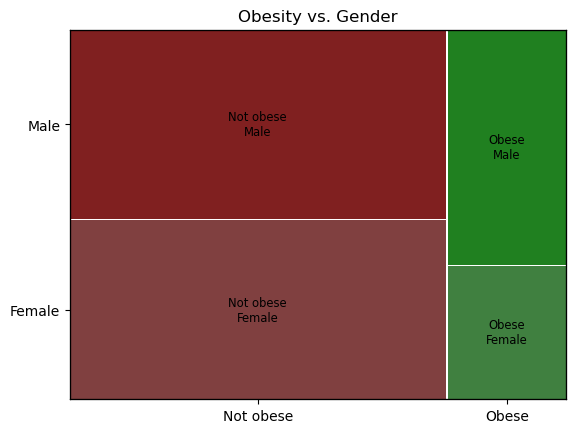


P-value: 0.0177
It is possible that there is a relationship.


Contingency table between Obesity Level and family_history_with_overweight

family_history_with_overweight   no  yes
NObeyesdad_new                          
Not obese                       173  206
Obese                            25   94



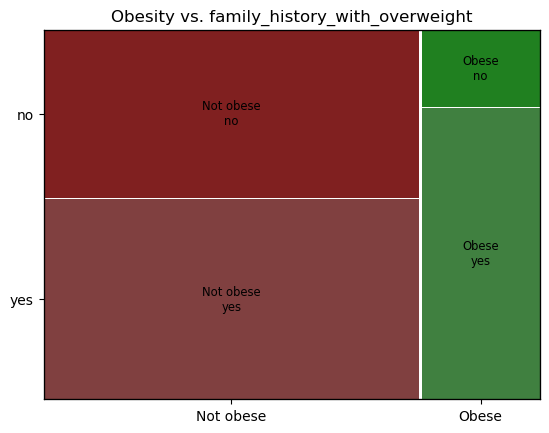


P-value: 0.0000
It is possible that there is a relationship.


Contingency table between Obesity Level and FAVC

FAVC             no  yes
NObeyesdad_new          
Not obese       111  268
Obese            39   80



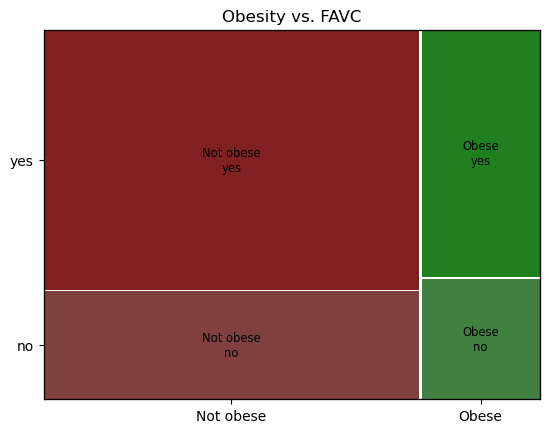


P-value: 0.4697
It is possible that there is no relationship.


Contingency table between Obesity Level and FCVC

FCVC            1.0  2.0  3.0
NObeyesdad_new               
Not obese        25  200  154
Obese             7   72   40



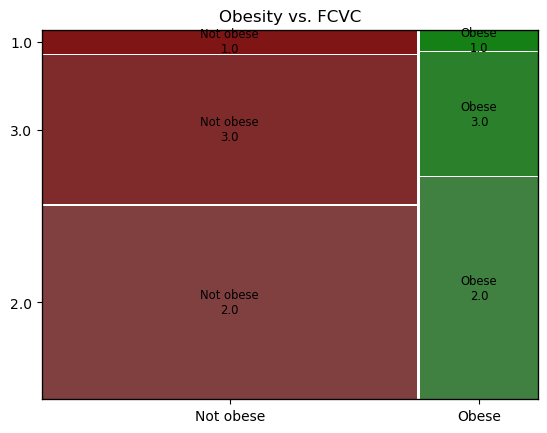


P-value: 0.3313
It is possible that there is no relationship.


Contingency table between Obesity Level and NCP

NCP             1.0  3.0  4.0
NObeyesdad_new               
Not obese        74  262   43
Obese            34   82    3



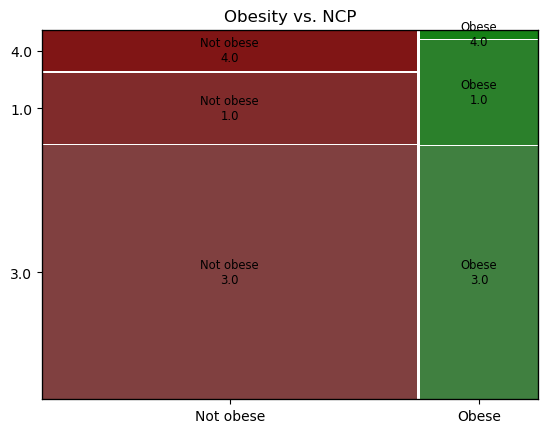


P-value: 0.0040
It is possible that there is a relationship.


Contingency table between Obesity Level and CAEC

CAEC            Always  Frequently  Sometimes  no
NObeyesdad_new                                   
Not obese           42         112        208  17
Obese               11          24         81   3



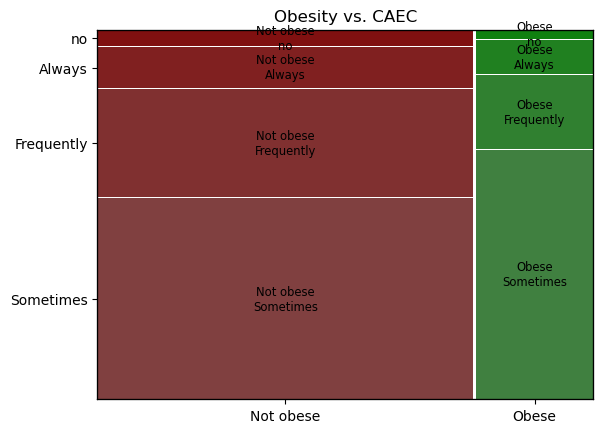


P-value: 0.0789
It is possible that there is no relationship.


Contingency table between Obesity Level and SMOKE

SMOKE            no  yes
NObeyesdad_new          
Not obese       362   17
Obese           104   15



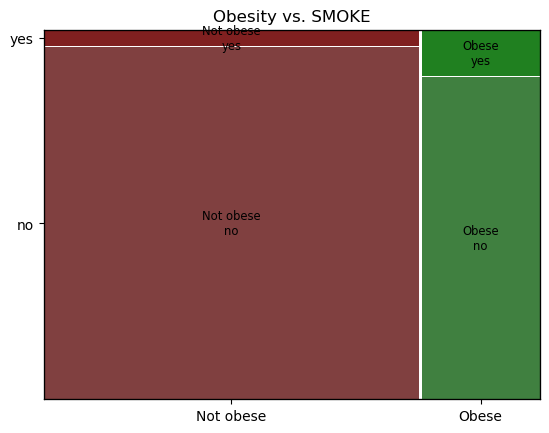


P-value: 0.0016
It is possible that there is a relationship.


Contingency table between Obesity Level and CH2O

CH2O            1.0  2.0  3.0
NObeyesdad_new               
Not obese       105  210   64
Obese            30   56   33



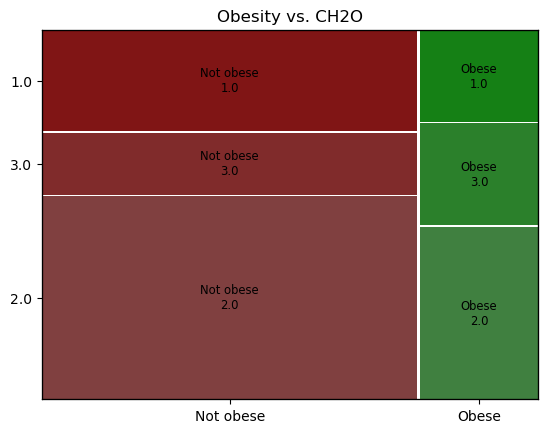


P-value: 0.0324
It is possible that there is a relationship.


Contingency table between Obesity Level and SCC

SCC              no  yes
NObeyesdad_new          
Not obese       331   48
Obese           112    7



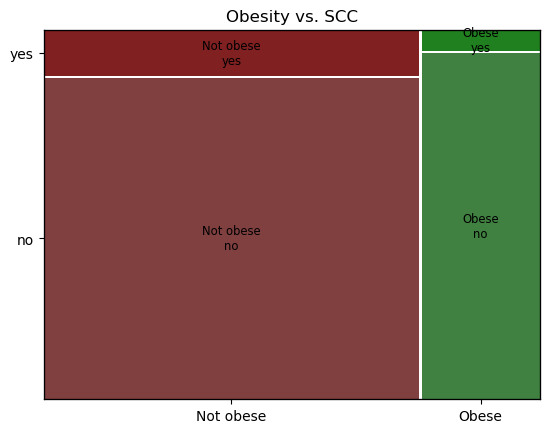


P-value: 0.0395
It is possible that there is a relationship.


Contingency table between Obesity Level and FAF

FAF             0.0  1.0  2.0  3.0
NObeyesdad_new                    
Not obese       110  123   93   53
Obese            52   35   20   12



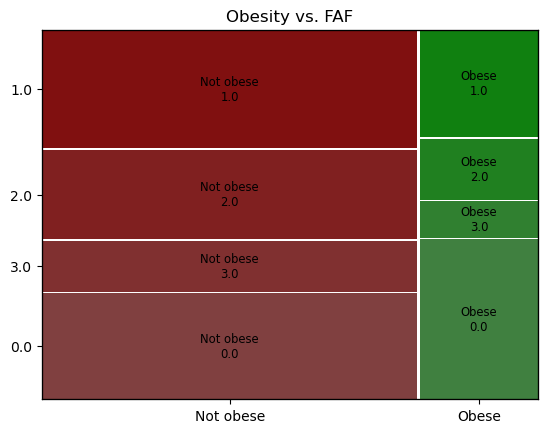


P-value: 0.0213
It is possible that there is a relationship.


Contingency table between Obesity Level and TUE

TUE             0.0  1.0  2.0
NObeyesdad_new               
Not obese       178  146   55
Obese            65   35   19



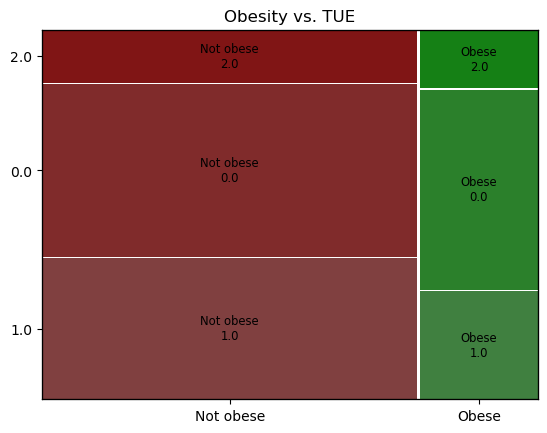


P-value: 0.1935
It is possible that there is no relationship.


Contingency table between Obesity Level and CALC

CALC            Always  Frequently  Sometimes   no
NObeyesdad_new                                    
Not obese            1          26        216  136
Obese                0          19         57   43



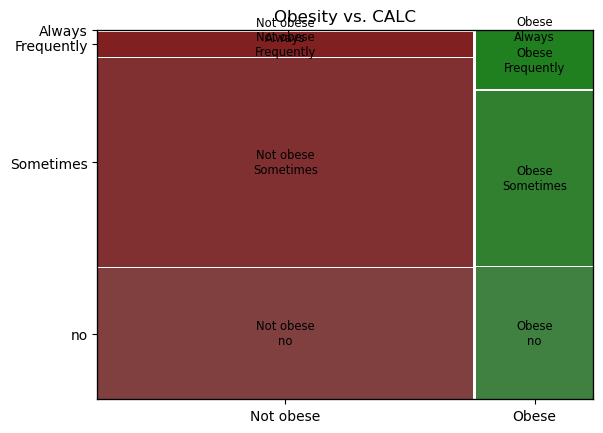


P-value: 0.0186
It is possible that there is a relationship.


Contingency table between Obesity Level and MTRANS

MTRANS          Automobile  Bike  Motorbike  Public_Transportation  Walking
NObeyesdad_new                                                             
Not obese               60     6          7                    259       47
Obese                   39     1          4                     67        8



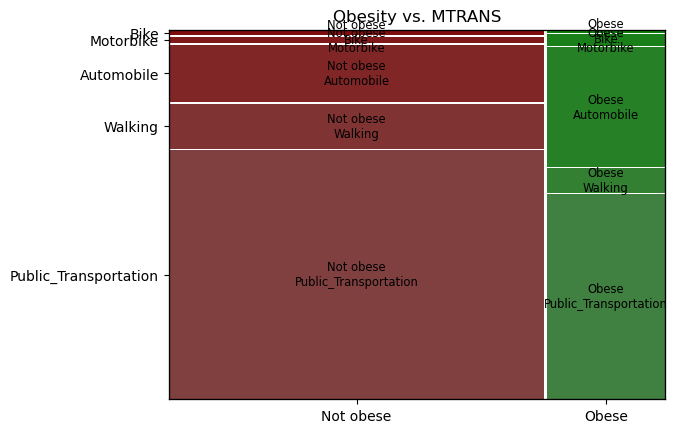


P-value: 0.0008
It is possible that there is a relationship.




In [57]:
#define function to perform chi-square test
def chisquare_test(table):
    stat, p_value, dof, expected = chi2_contingency(table, correction=False)
    alpha = 0.05
    print('P-value: {0:0.4f}'.format(p_value))
    if p_value <= alpha:
        print('It is possible that there is a relationship.')
    else:
        print('It is possible that there is no relationship.')

#create contingency table and conduct chi squared test for all categorical data
columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 
           'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']
for i in columns:
    contingency_table = pd.crosstab(obesity_df['NObeyesdad_new'], obesity_df[i])
    print('Contingency table between Obesity Level and', i)
    print('')
    print(contingency_table)
    print('')
    #create mosaic plot
    obesity_df.loc[obesity_df['NObeyesdad_new']==1,'NObeyesdad_new']='Obese'
    obesity_df.loc[obesity_df['NObeyesdad_new']==0,'NObeyesdad_new']='Not obese'
    mosaic(obesity_df, ['NObeyesdad_new', i], title = 'Obesity vs. {}'.format(i))
    plt.show()
    print('')
    chisquare_test(contingency_table)
    print('')
    print('============================================')
    print('')

Correlation between explanatory variables was also tested.

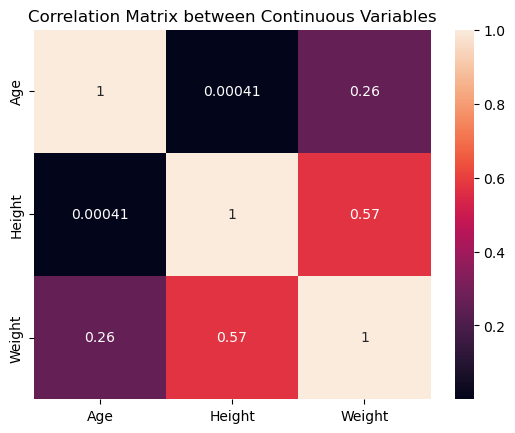

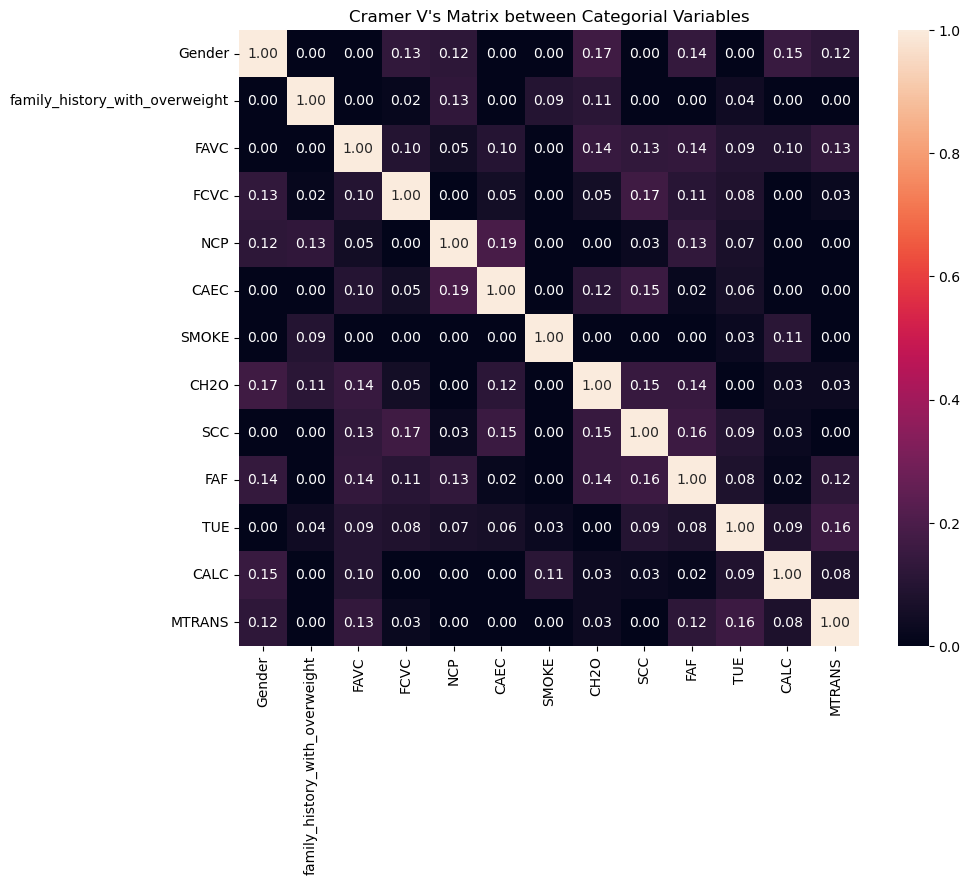

There are statistically significant differences in the means of Age across the categories of family_history_with_overweight
There are statistically significant differences in the means of Age across the categories of FAVC
There are statistically significant differences in the means of Age across the categories of SMOKE
There are statistically significant differences in the means of Age across the categories of TUE
There are statistically significant differences in the means of Age across the categories of CALC
There are statistically significant differences in the means of Age across the categories of MTRANS
There are statistically significant differences in the means of Height across the categories of Gender
There are statistically significant differences in the means of Height across the categories of family_history_with_overweight
There are statistically significant differences in the means of Height across the categories of NCP
There are statistically significant differences in the

In [58]:
categorical = ['Gender', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 
               'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']
continuous = ['Age', 'Height', 'Weight']
# heatmap to show correlation matrix between continuous features
correlation_matrix = obesity_df[continuous].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix between Continuous Variables')
plt.show()

def cramers_v(x,y):
    #create contingency table
    contingency_table = pd.crosstab(x,y)
    #calculate chi-square statistic
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    #Cramer's V calculation
    phi2 = chi2/n
    r, k = contingency_table.shape
    phi2_corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2_corr / min(k_corr-1, r_corr-1))

#initialize matrix
cramers_v_matrix = pd.DataFrame(np.zeros((len(categorical), len(categorical))),
                                index=categorical, columns=categorical)

# Loop over variables to fill in the matrix
for i, var1 in enumerate(categorical):
    for j, var2 in enumerate(categorical):
        if i >= j:
           # Cramer's V is symmetric, considering the same pair only once
            if i == j: # diagonal elements are maximum
                cramers_v_matrix.loc[var1, var2] = 1.0
            else:
                cramers_v_val = cramers_v(obesity_df[var1], obesity_df[var2])
                cramers_v_matrix.loc[var1, var2] = cramers_v_val
                cramers_v_matrix.loc[var2, var1] = cramers_v_val  # symmetry

# Create a heatmap of the Cramer's V matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix, annot=True, fmt=".2f")
plt.title("Cramer V's Matrix between Categorial Variables")
plt.show()

# Initialize a dictionary to store ANOVA results
anova_results = {}

# Conduct ANOVA between each continuous and categorical variable
for cont_var in continuous:
    for cat_var in categorical:
        # Extract the continuous variable values corresponding to the categories
        groups=[group[1][cont_var].values for group in obesity_df.groupby(cat_var)]
        # Conduct the ANOVA test
        f_value, p_value = f_oneway(*groups)
         # Store results
        anova_results[(cont_var, cat_var)] = (f_value, p_value)
        if p_value <= 0.05:
            print('There are statistically significant differences in the means of',
                  cont_var, 'across the categories of', cat_var)


Once statistical significance was determined, descriptive statistics and graphical representations were used to inspect the data more closely to determine if there are any Type I or Type II errors.

In [59]:
#binning data into binary values
obesity_df['NObeyesdad_new'] = obesity_df['NObeyesdad'].map(
                                                    {'Insufficient_Weight': 0,
                                                    'Normal_Weight': 0, 
                                                    'Overweight_Level_I': 0,
                                                    'Overweight_Level_II':1,
                                                    'Obesity_Type_I': 1,
                                                    'Obesity_Type_II': 1,
                                                    'Obesity_Type_III': 1})

#Descriptive statistics for continuous variables
not_obese = obesity_df[obesity_df['NObeyesdad_new']==0]
obese = obesity_df[obesity_df['NObeyesdad_new']==1]  

#print out descriptive statistics for each continuous variable 
#separated by obesity level
continuous = ['Age', 'Weight', 'Height']
for i in continuous:
    print('Descriptive Statistics for {} of Non-Obese People'.format(i))
    print(not_obese[i].describe())
    print('')
    print('Descriptive Statistics for {} of Obese People'.format(i))
    print(obese[i].describe())
    print('')
    print('=======================================')
    print('')

Descriptive Statistics for Age of Non-Obese People
count    379.000000
mean      21.941953
std        5.479332
min       14.000000
25%       19.000000
50%       21.000000
75%       23.000000
max       61.000000
Name: Age, dtype: float64

Descriptive Statistics for Age of Obese People
count    119.000000
mean      26.983193
std        8.637701
min       15.000000
25%       21.000000
50%       24.000000
75%       32.500000
max       56.000000
Name: Age, dtype: float64


Descriptive Statistics for Weight of Non-Obese People
count    379.000000
mean      62.890501
std       10.712993
min       39.000000
25%       55.000000
50%       62.000000
75%       70.000000
max       91.000000
Name: Weight, dtype: float64

Descriptive Statistics for Weight of Obese People
count    119.000000
mean      90.842857
std       15.868435
min       60.000000
25%       80.000000
50%       87.000000
75%       99.000000
max      173.000000
Name: Weight, dtype: float64


Descriptive Statistics for Height of Non-O

Box plots of Age, Weight, and Height divided into granular levels of obesity:


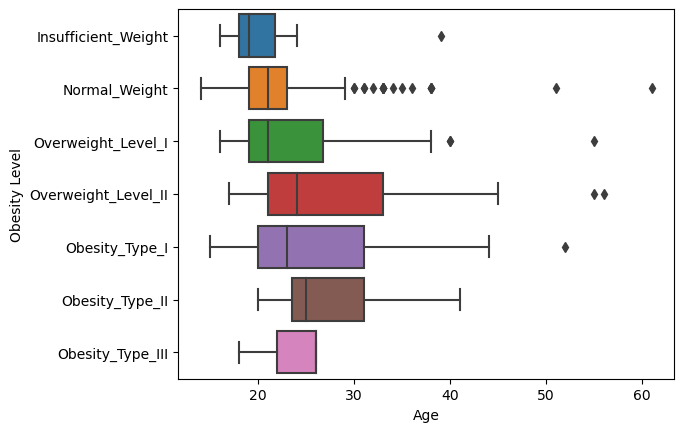

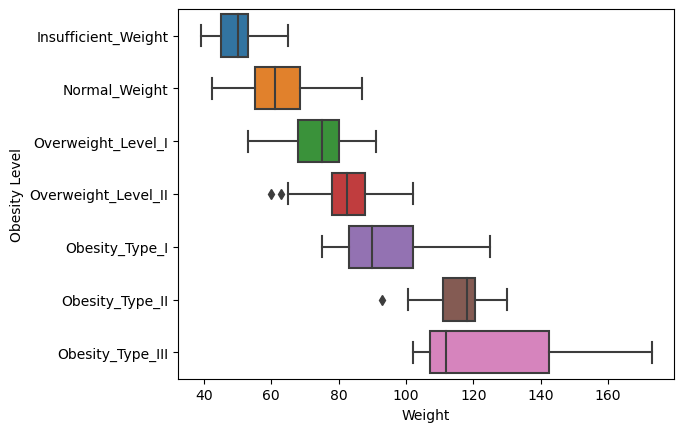

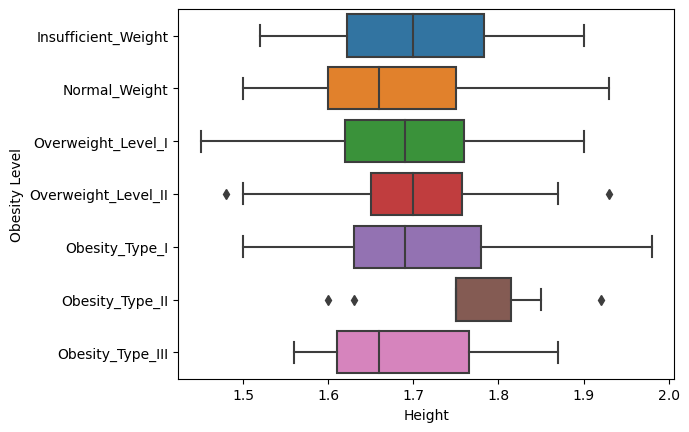

In [60]:
print('Box plots of Age, Weight, and Height divided into granular levels of obesity:')

#Create boxplots for continuous variables for each obesity level
desired_order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 
    'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
continuous_variables = ['Age', 'Weight', 'Height']
for i in continuous_variables:
    sns.boxplot(x=i, y='NObeyesdad', data=obesity_df, orient='h', 
                order = desired_order)
    plt.ylabel('Obesity Level')
    plt.show()
    

Box plots of Age, Weight, Height divided into two groups of obesity level:


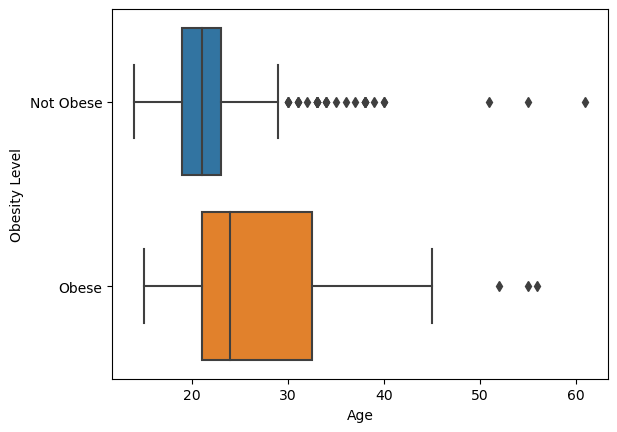

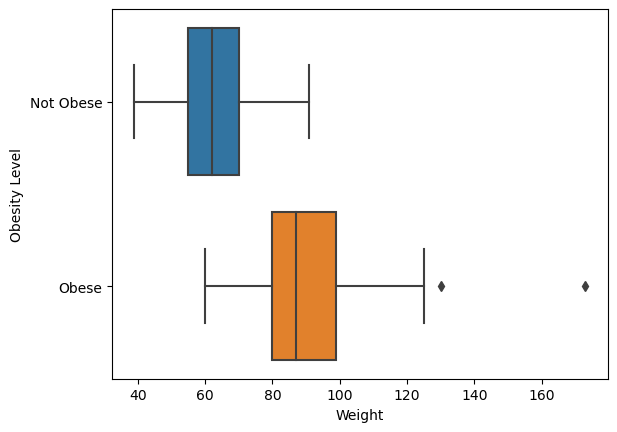

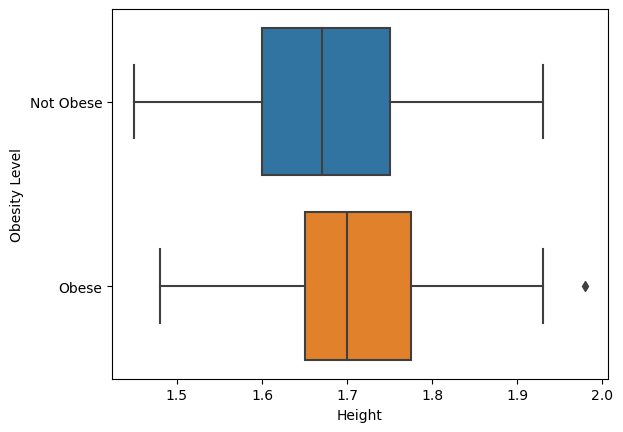

In [23]:
print('Box plots of Age, Weight, Height divided into two groups of obesity level:')

#create box plots for continuous variables for not obese and obese
continuous_variables = ['Age', 'Weight', 'Height']
for i in continuous_variables:
    ax = sns.boxplot(x=i, y='NObeyesdad_new', data=obesity_df, orient='h')
    ax.set_yticklabels(['Not Obese', 'Obese'])
    plt.ylabel('Obesity Level')
    plt.show()

Stacked bar graph of percentages for each categorical variable for Not Obese and Obese:


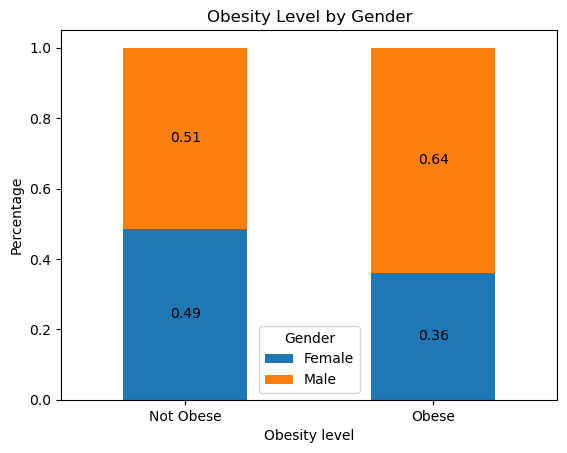

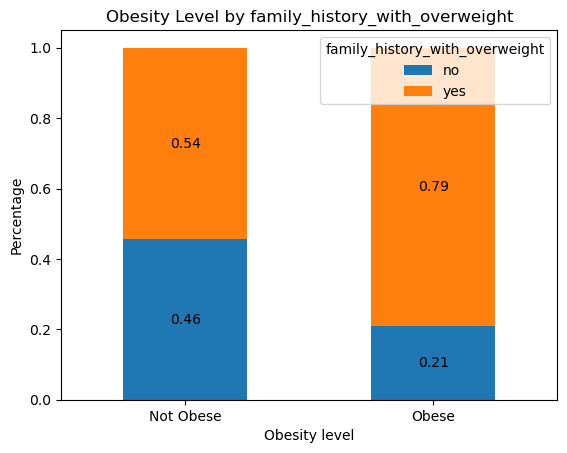

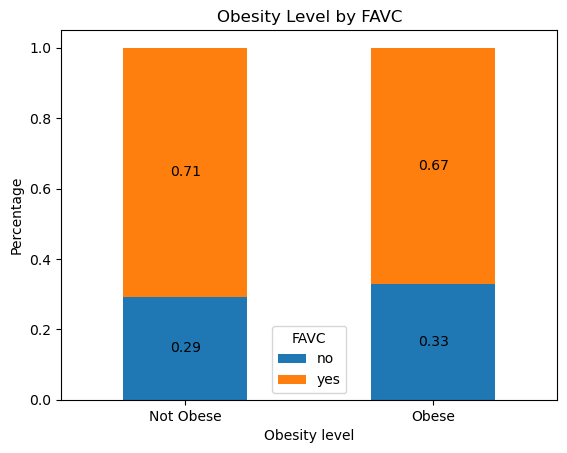

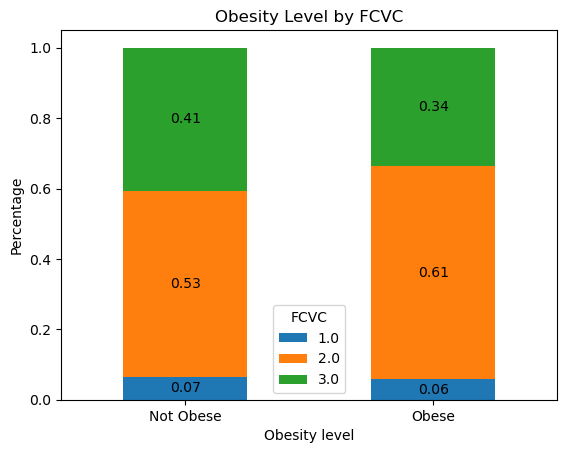

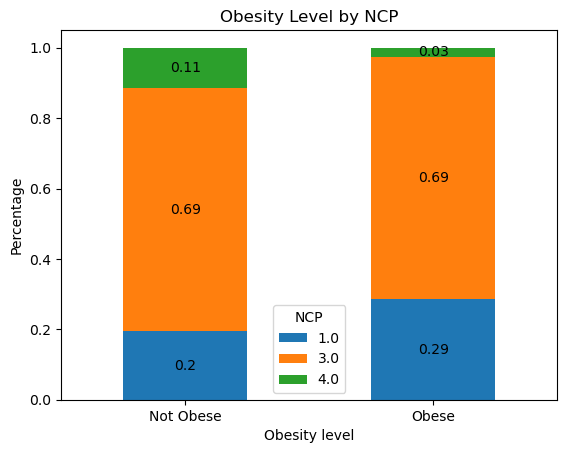

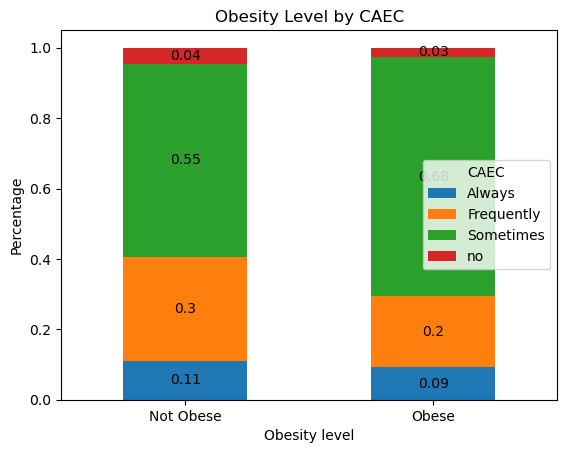

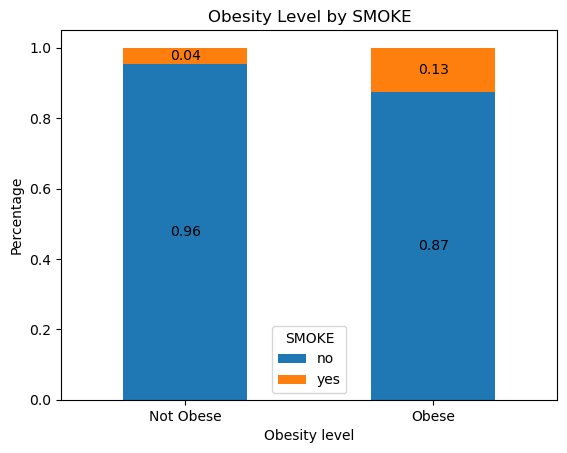

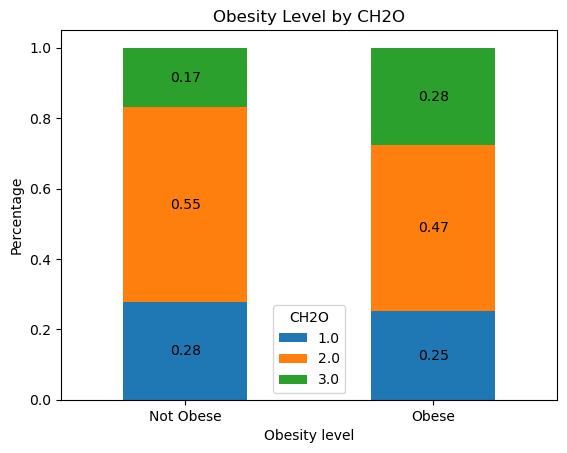

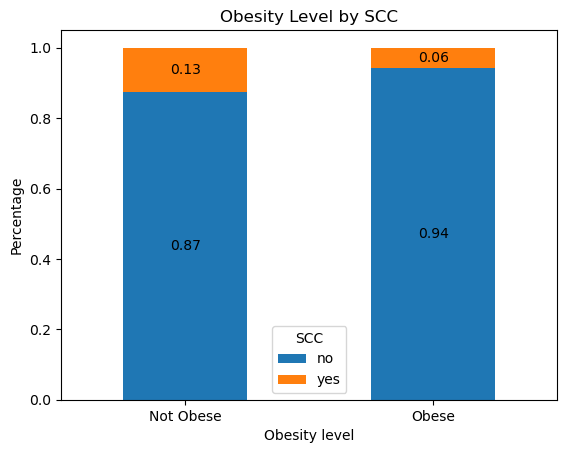

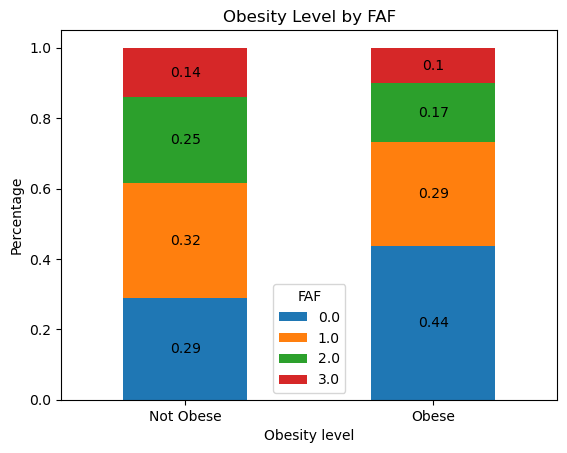

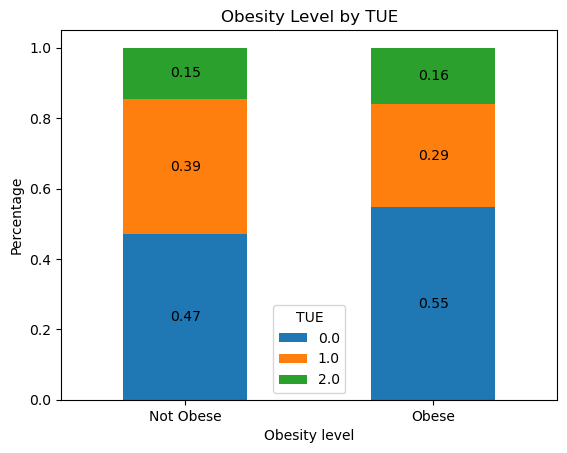

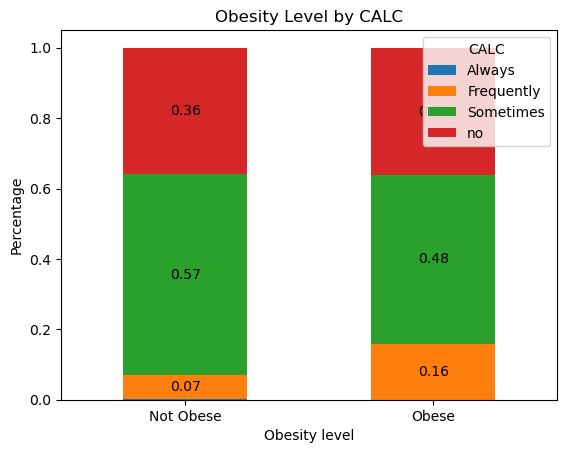

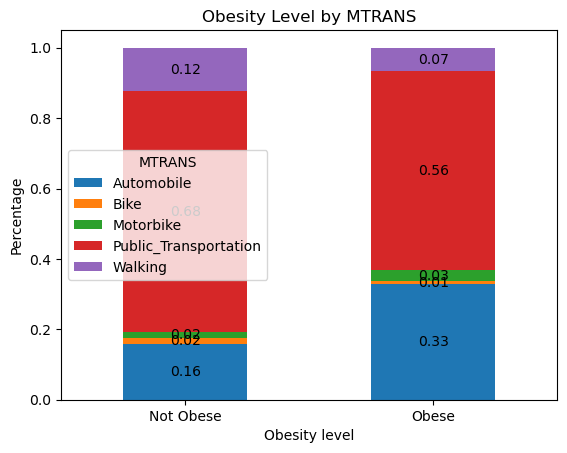

In [24]:
print('Stacked bar graph of percentages for each categorical variable for Not Obese and Obese:')
#Prepared data for visualization
def percent_of_total(second_column):
    percent_of_total = obesity_df.groupby(['NObeyesdad_new', second_column]).size().unstack().fillna(0)
    for i in range(len(percent_of_total)):
        percent_of_total.iloc[i,:] = percent_of_total.iloc[i,:]/sum(percent_of_total.iloc[i,:])
    return percent_of_total

#Visualize relationship between categorical variables and two groups of obesity level using stacked bar graphs
categorical_variables = ['Gender', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 
                         'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']
for i in categorical_variables:
    fig, ax = plt.subplots(1,1)
    percentage = percent_of_total(i)
    percentage.index = ['Not Obese', 'Obese']
    plot = percentage.plot(ax=ax, kind = 'bar', stacked = True, xlabel = 'Obesity level', 
                    ylabel = 'Percentage', title = 'Obesity Level by {}'.format(i), rot =0)
    #label each stack with percentage
    for c in plot.containers: 
        labels = [round(v.get_height(),2) if round(v.get_height(),2) > 0 else '' for v in c]
        plot.bar_label(c, labels = labels, label_type = 'center')
    plt.show()
    

Stacked bar graph of percentages for each categorical variable for all obesity levels:


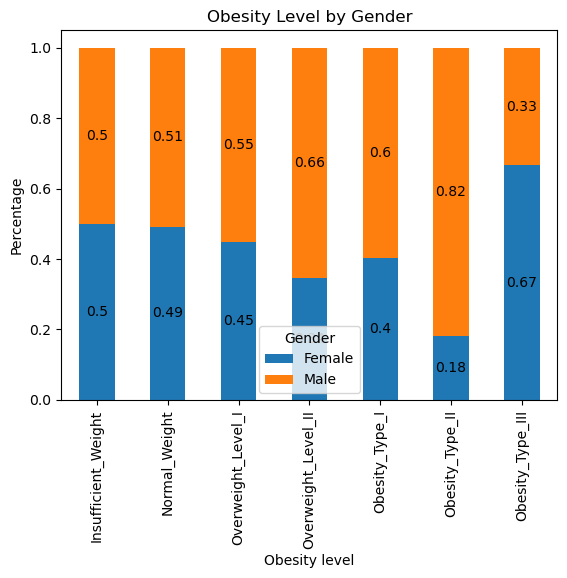

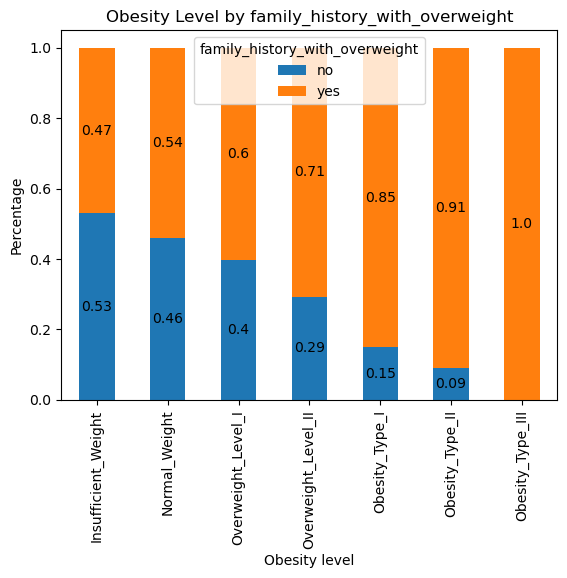

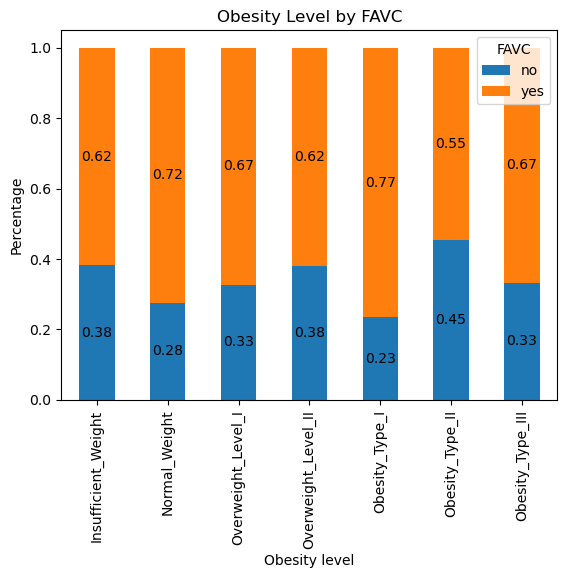

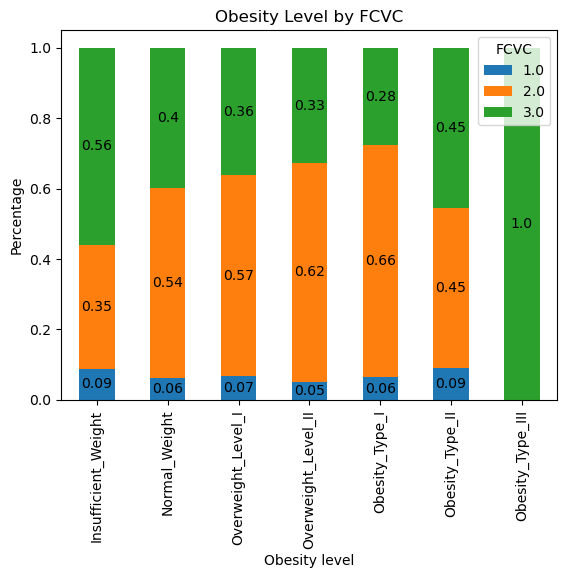

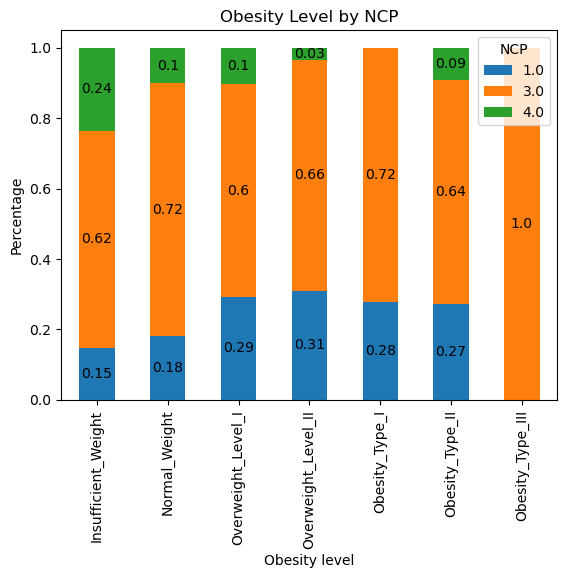

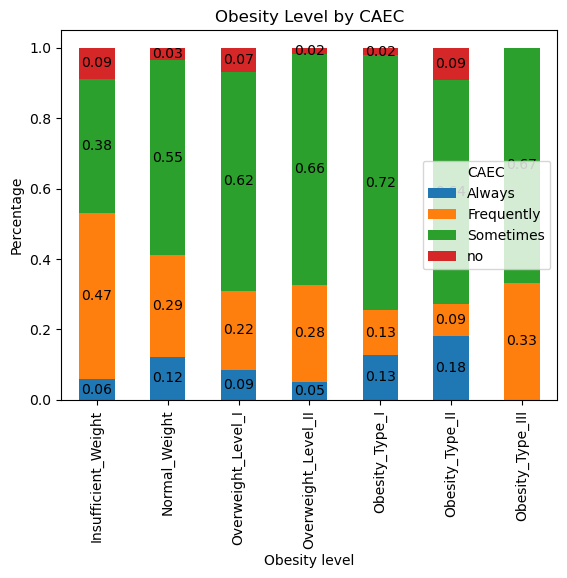

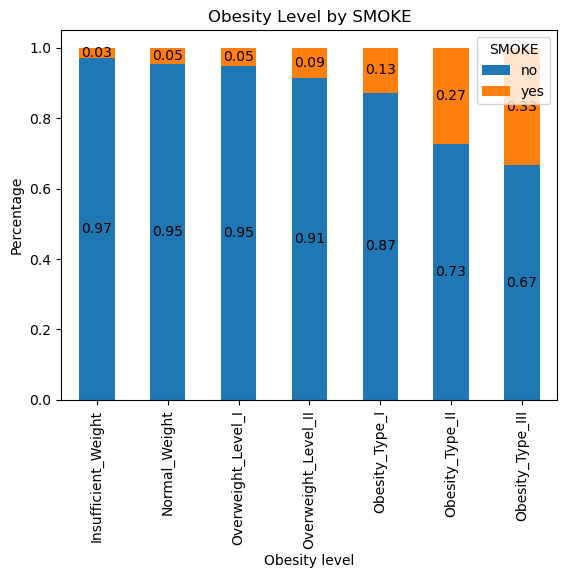

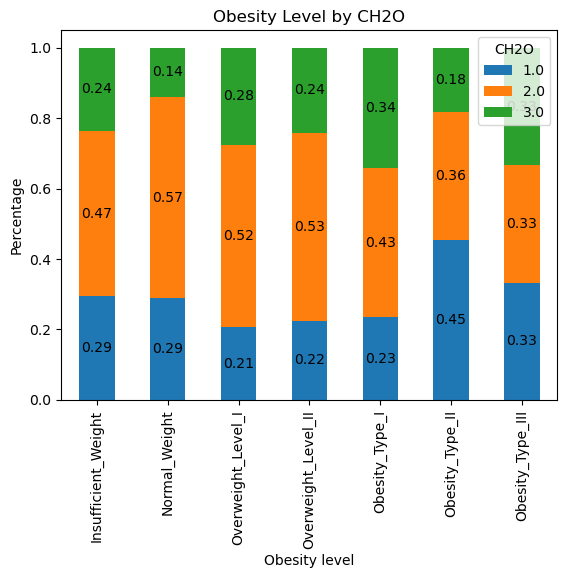

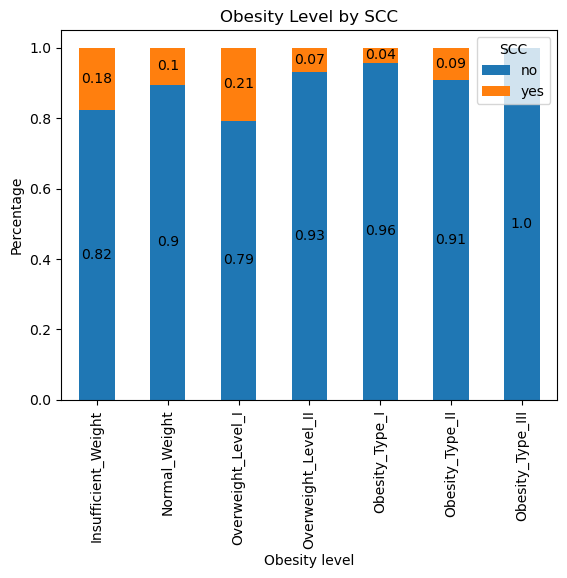

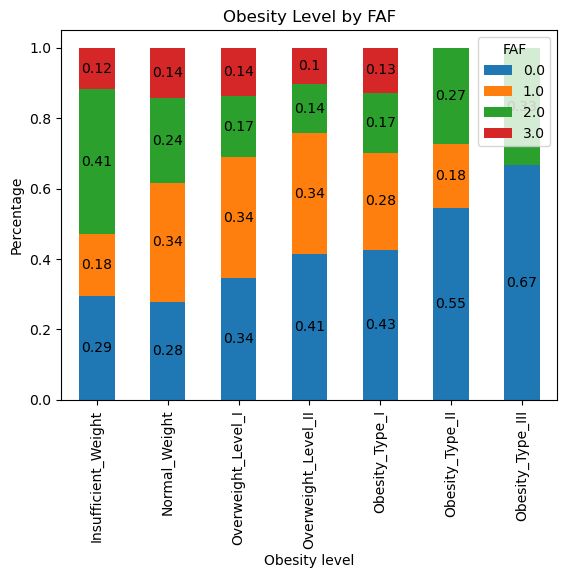

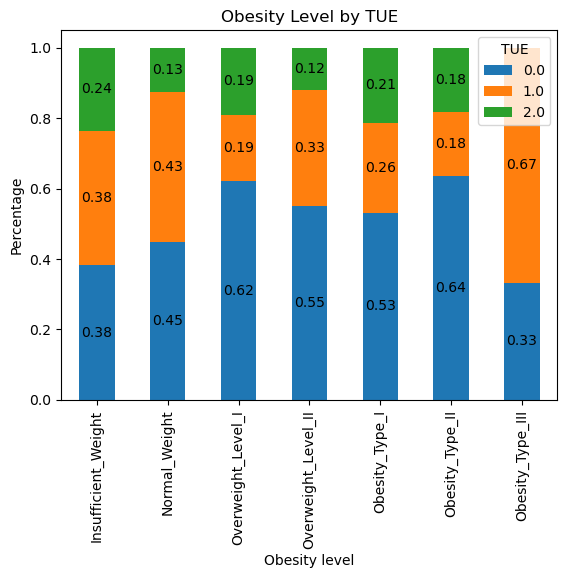

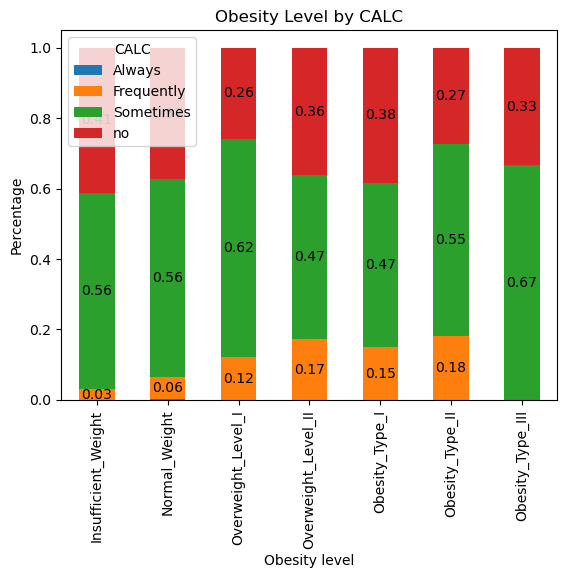

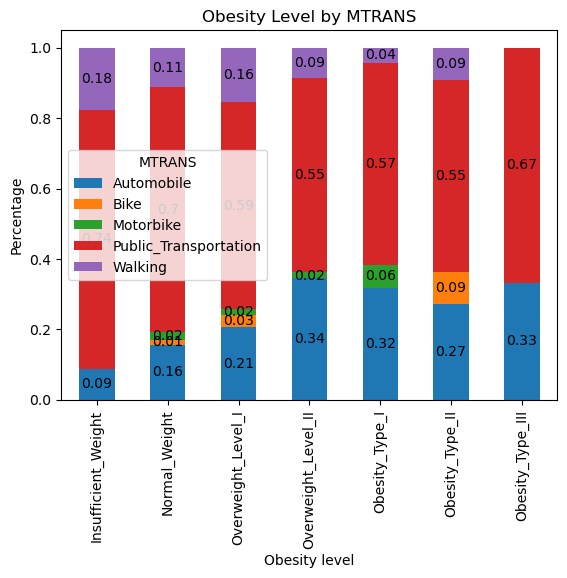

In [25]:
print('Stacked bar graph of percentages for each categorical variable for all obesity levels:')
#Prepared data for visualization
def percent_of_total(second_column):
    percent_of_total = obesity_df.groupby(['NObeyesdad', second_column]).size().unstack().fillna(0)
    for i in range(len(percent_of_total)):
        percent_of_total.iloc[i,:] = percent_of_total.iloc[i,:]/sum(percent_of_total.iloc[i,:])
    return percent_of_total

#Visualize relationship between categorical variables and all obesity levels with stacked bar graph
categorical_variables = ['Gender', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 
                         'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']
desired_order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 
                 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
for i in categorical_variables:
    fig, ax = plt.subplots(1,1)
    percentage = percent_of_total(i)
    percentage = percentage.reindex(desired_order)
    plot = percentage.plot(ax=ax, kind = 'bar', stacked = True, xlabel = 'Obesity level', 
                    ylabel = 'Percentage', title = 'Obesity Level by {}'.format(i))
    #label each stack with percentages
    for c in plot.containers: 
        labels = [round(v.get_height(),2) if round(v.get_height(),2) > 0 else '' for v in c]
        plot.bar_label(c, labels = labels, label_type = 'center')
    plt.show()
    

# Additional Graphs

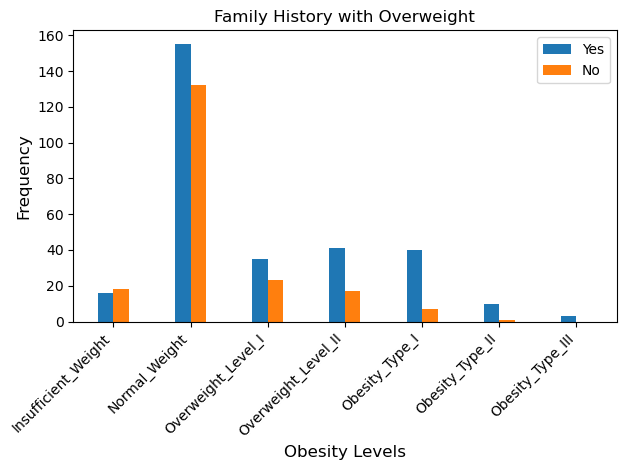

In [26]:
import matplotlib.pyplot as plt

# Sample data for family history with overweight
categories = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
values1 = []
values2 = []
for i in categories:
    values1.append((obesity_df[obesity_df['NObeyesdad'] == i]['family_history_with_overweight']=='yes').sum())
    values2.append((obesity_df[obesity_df['NObeyesdad'] == i]['family_history_with_overweight']=='no').sum())

# Define the width of the bars
bar_width = 0.2

# Calculate the position of each group of bars on the x-axis
x = range(len(categories))

# Create bars
plt.bar(x, values1, width=bar_width, label='Yes')
plt.bar([pos + bar_width for pos in x], values2, width=bar_width, label='No')

# Add labels and title
plt.xlabel('Obesity Levels', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Family History with Overweight')
plt.xticks([pos + bar_width / 2 for pos in x], categories, rotation=45, ha='right')  # Set x-axis labels
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

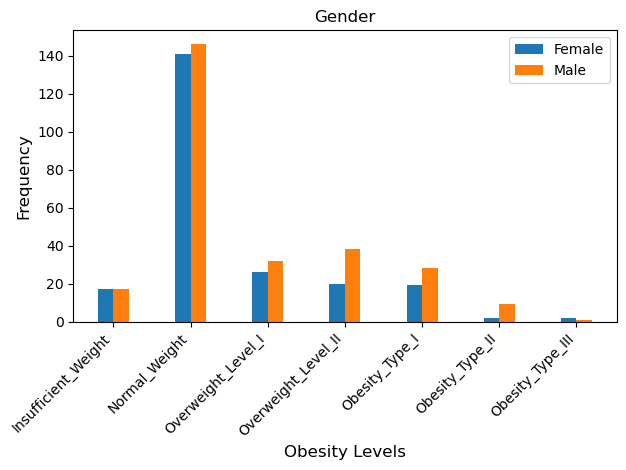

In [27]:
import matplotlib.pyplot as plt

# Sample data for gender
categories = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
values1 = []
values2 = []
for i in categories:
    values1.append((obesity_df[obesity_df['NObeyesdad'] == i]['Gender']=='Female').sum())
    values2.append((obesity_df[obesity_df['NObeyesdad'] == i]['Gender']=='Male').sum())

# Define the width of the bars
bar_width = 0.2

# Calculate the position of each group of bars on the x-axis
x = range(len(categories))

# Create the first set of bars
plt.bar(x, values1, width=bar_width, label='Female')
plt.bar([pos + bar_width for pos in x], values2, width=bar_width, label='Male')

# Add labels and title
plt.xlabel('Obesity Levels', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Gender')
plt.xticks([pos + bar_width / 2 for pos in x], categories, rotation=45, ha='right')  # Set x-axis labels
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

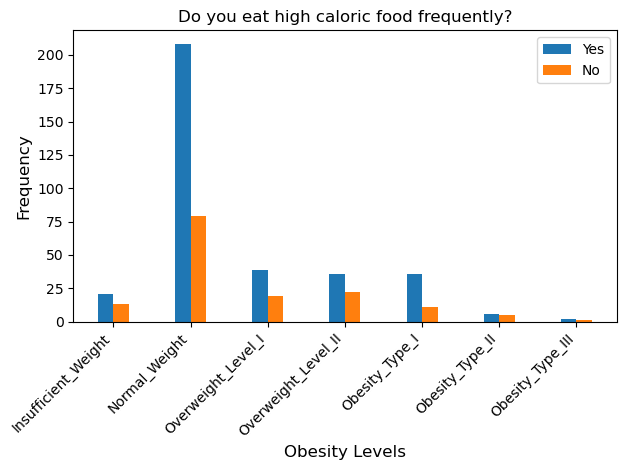

In [28]:
# Sample data for "Do you eat high caloric food frequently"
categories = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
values1 = []
values2 = []
for i in categories:
    values1.append((obesity_df[obesity_df['NObeyesdad'] == i]['FAVC']=='yes').sum())
    values2.append((obesity_df[obesity_df['NObeyesdad'] == i]['FAVC']=='no').sum())

# Define the width of the bars
bar_width = 0.2

# Calculate the position of each group of bars on the x-axis
x = range(len(categories))

# Create bars
plt.bar(x, values1, width=bar_width, label='Yes')
plt.bar([pos + bar_width for pos in x], values2, width=bar_width, label='No')

# Add labels and title
plt.xlabel('Obesity Levels', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Do you eat high caloric food frequently?')
plt.xticks([pos + bar_width / 2 for pos in x], categories, rotation=45, ha='right')  # Set x-axis labels
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

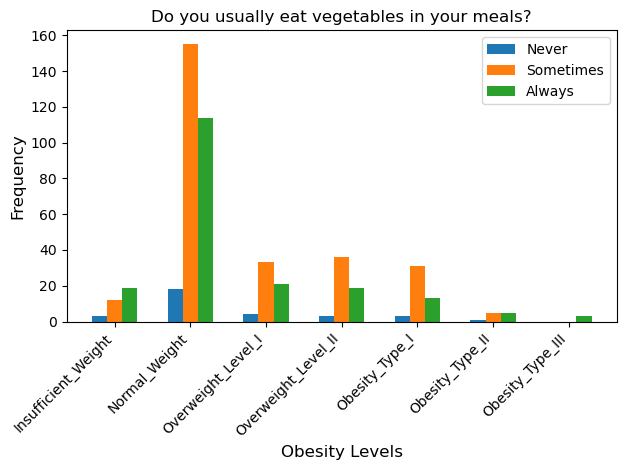

In [29]:
# Sample data for "Do you usually eat vegetables in your meals"
categories = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
values1 = []
values2 = []
values3 = []
for i in categories:
    values1.append((obesity_df[obesity_df['NObeyesdad'] == i]['FCVC']== 1).sum())
    values2.append((obesity_df[obesity_df['NObeyesdad'] == i]['FCVC']== 2).sum())
    values3.append((obesity_df[obesity_df['NObeyesdad'] == i]['FCVC']== 3).sum())


# Define the width of the bars
bar_width = 0.2

# Calculate the position of each group of bars on the x-axis
x = range(len(categories))

# Create bars
plt.bar(x, values1, width=bar_width, label='Never')
plt.bar([pos + bar_width for pos in x], values2, width=bar_width, label='Sometimes')
plt.bar([pos + 2 * bar_width for pos in x], values3, width=bar_width, label = 'Always')

# Add labels and title
plt.xlabel('Obesity Levels', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Do you usually eat vegetables in your meals?')
plt.xticks([pos + bar_width for pos in x], categories, rotation=45, ha='right')  # Set x-axis labels
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

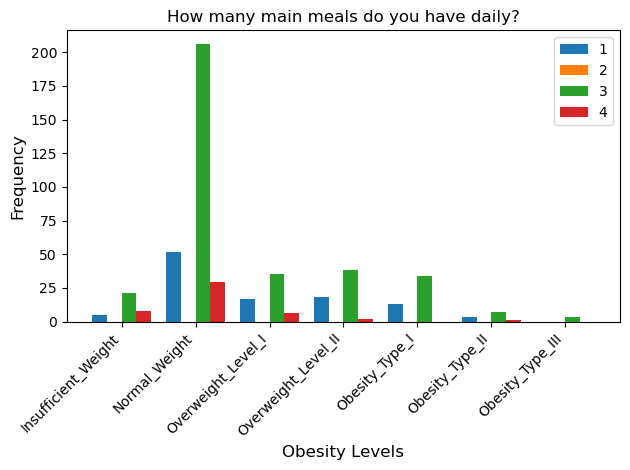

In [30]:
# Sample data for "How many main meals do you have daily?"
categories = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
values1 = []
values2 = []
values3 = []
values4 = []
for i in categories:
    values1.append((obesity_df[obesity_df['NObeyesdad'] == i]['NCP']== 1).sum())
    values2.append((obesity_df[obesity_df['NObeyesdad'] == i]['NCP']== 2).sum())
    values3.append((obesity_df[obesity_df['NObeyesdad'] == i]['NCP']== 3).sum())
    values4.append((obesity_df[obesity_df['NObeyesdad'] == i]['NCP']== 4).sum())

# Define the width of the bars
bar_width = 0.2

# Calculate the position of each group of bars on the x-axis
x = range(len(categories))

# Create bars
plt.bar(x, values1, width=bar_width, label='1')
plt.bar([pos + bar_width for pos in x], values2, width=bar_width, label='2')
plt.bar([pos + 2 * bar_width for pos in x], values3, width=bar_width, label = '3')
plt.bar([pos + 3 * bar_width for pos in x], values4, width=bar_width, label = '4')

# Add labels and title
plt.xlabel('Obesity Levels', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('How many main meals do you have daily?')
plt.xticks([pos + 1.5 * bar_width for pos in x], categories, rotation=45, ha='right')  # Set x-axis labels
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

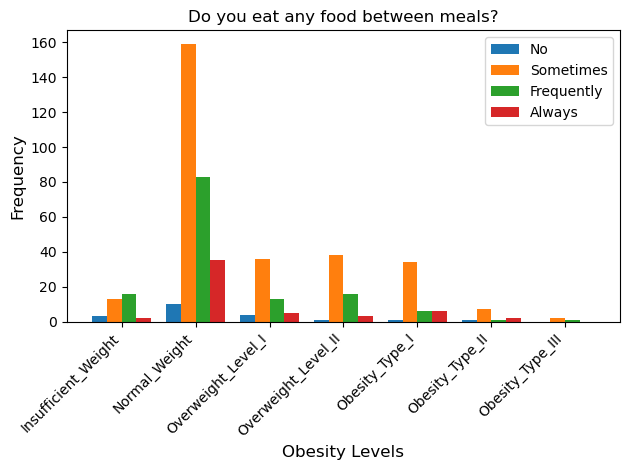

In [31]:
# Sample data for "Do you eat any food between meals?"
categories = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
values1 = []
values2 = []
values3 = []
values4 = []
for i in categories:
    values1.append((obesity_df[obesity_df['NObeyesdad'] == i]['CAEC']== 'no').sum())
    values2.append((obesity_df[obesity_df['NObeyesdad'] == i]['CAEC']== 'Sometimes').sum())
    values3.append((obesity_df[obesity_df['NObeyesdad'] == i]['CAEC']== 'Frequently').sum())
    values4.append((obesity_df[obesity_df['NObeyesdad'] == i]['CAEC']== 'Always').sum())

# Define the width of the bars
bar_width = 0.2

# Calculate the position of each group of bars on the x-axis
x = range(len(categories))

# Create bars
plt.bar(x, values1, width=bar_width, label='No')
plt.bar([pos + bar_width for pos in x], values2, width=bar_width, label='Sometimes')
plt.bar([pos + 2 * bar_width for pos in x], values3, width=bar_width, label = 'Frequently')
plt.bar([pos + 3 * bar_width for pos in x], values4, width=bar_width, label = 'Always')

# Add labels and title
plt.xlabel('Obesity Levels', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Do you eat any food between meals?')
plt.xticks([pos + 1.5 * bar_width for pos in x], categories, rotation=45, ha='right')  # Set x-axis labels
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

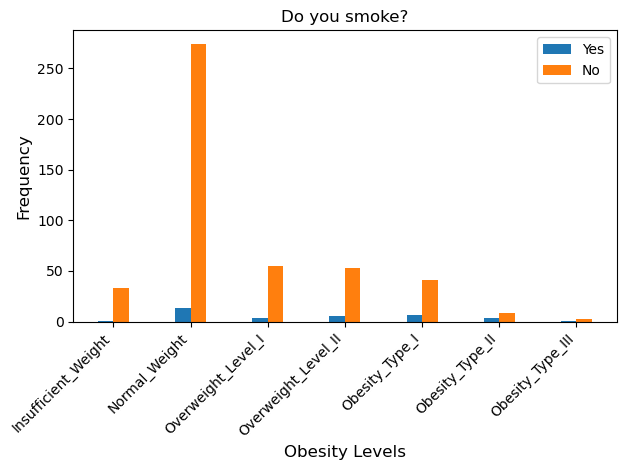

In [32]:
# Sample data for "Do you smoke"
categories = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
values1 = []
values2 = []
for i in categories:
    values1.append((obesity_df[obesity_df['NObeyesdad'] == i]['SMOKE']=='yes').sum())
    values2.append((obesity_df[obesity_df['NObeyesdad'] == i]['SMOKE']=='no').sum())

# Define the width of the bars
bar_width = 0.2

# Calculate the position of each group of bars on the x-axis
x = range(len(categories))

# Create bars
plt.bar(x, values1, width=bar_width, label='Yes')
plt.bar([pos + bar_width for pos in x], values2, width=bar_width, label='No')

# Add labels and title
plt.xlabel('Obesity Levels', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Do you smoke?')
plt.xticks([pos + bar_width / 2 for pos in x], categories, rotation=45, ha='right')  # Set x-axis labels
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

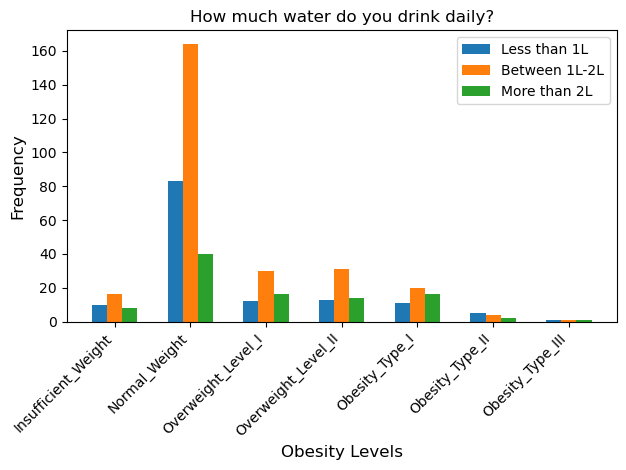

In [33]:
# Sample data for "How much water do you drink daily?"
categories = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
values1 = []
values2 = []
values3 = []
for i in categories:
    values1.append((obesity_df[obesity_df['NObeyesdad'] == i]['CH2O']== 1).sum())
    values2.append((obesity_df[obesity_df['NObeyesdad'] == i]['CH2O']== 2).sum())
    values3.append((obesity_df[obesity_df['NObeyesdad'] == i]['CH2O']== 3).sum())


# Define the width of the bars
bar_width = 0.2

# Calculate the position of each group of bars on the x-axis
x = range(len(categories))

# Create bars
plt.bar(x, values1, width=bar_width, label='Less than 1L')
plt.bar([pos + bar_width for pos in x], values2, width=bar_width, label='Between 1L-2L')
plt.bar([pos + 2 * bar_width for pos in x], values3, width=bar_width, label = 'More than 2L')

# Add labels and title
plt.xlabel('Obesity Levels', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('How much water do you drink daily?')
plt.xticks([pos + bar_width for pos in x], categories, rotation=45, ha='right')  # Set x-axis labels
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

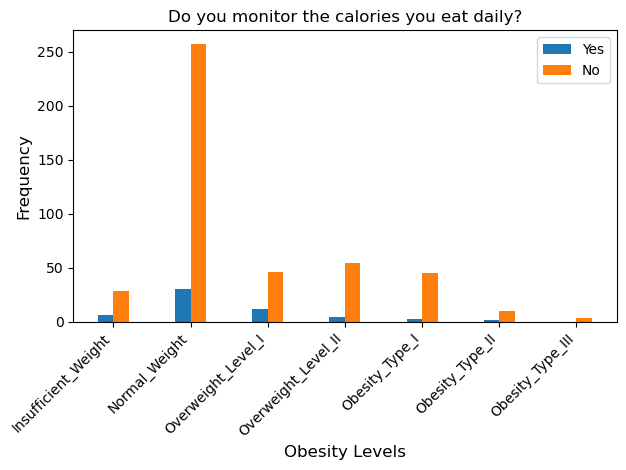

In [34]:
# Sample data for "Do you monitor the calories you eat daily?"
categories = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
values1 = []
values2 = []
for i in categories:
    values1.append((obesity_df[obesity_df['NObeyesdad'] == i]['SCC']=='yes').sum())
    values2.append((obesity_df[obesity_df['NObeyesdad'] == i]['SCC']=='no').sum())

# Define the width of the bars
bar_width = 0.2

# Calculate the position of each group of bars on the x-axis
x = range(len(categories))

# Create bars
plt.bar(x, values1, width=bar_width, label='Yes')
plt.bar([pos + bar_width for pos in x], values2, width=bar_width, label='No')

# Add labels and title
plt.xlabel('Obesity Levels', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Do you monitor the calories you eat daily?')
plt.xticks([pos + bar_width / 2 for pos in x], categories, rotation=45, ha='right')  # Set x-axis labels
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

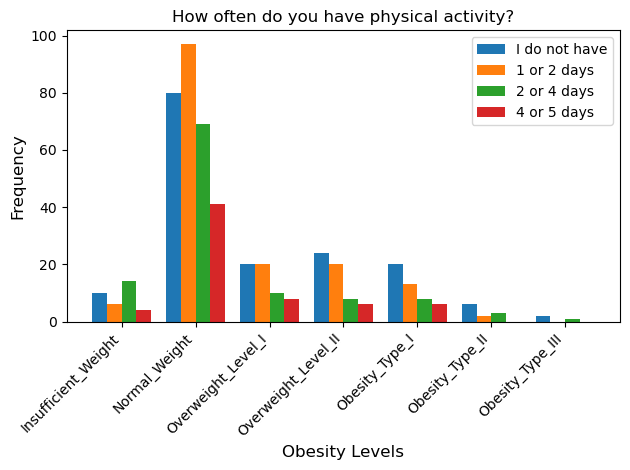

In [35]:
# Sample data for "How often do you have physical activity?"
categories = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
values1 = []
values2 = []
values3 = []
values4 = []
for i in categories:
    values1.append((obesity_df[obesity_df['NObeyesdad'] == i]['FAF']== 0).sum())
    values2.append((obesity_df[obesity_df['NObeyesdad'] == i]['FAF']== 1).sum())
    values3.append((obesity_df[obesity_df['NObeyesdad'] == i]['FAF']== 2).sum())
    values4.append((obesity_df[obesity_df['NObeyesdad'] == i]['FAF']== 3).sum())

# Define the width of the bars
bar_width = 0.2

# Calculate the position of each group of bars on the x-axis
x = range(len(categories))

# Create bars
plt.bar(x, values1, width=bar_width, label='I do not have')
plt.bar([pos + bar_width for pos in x], values2, width=bar_width, label='1 or 2 days')
plt.bar([pos + 2 * bar_width for pos in x], values3, width=bar_width, label = '2 or 4 days')
plt.bar([pos + 3 * bar_width for pos in x], values4, width=bar_width, label = '4 or 5 days')

# Add labels and title
plt.xlabel('Obesity Levels', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('How often do you have physical activity?')
plt.xticks([pos + 1.5 * bar_width for pos in x], categories, rotation=45, ha='right')  # Set x-axis labels
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

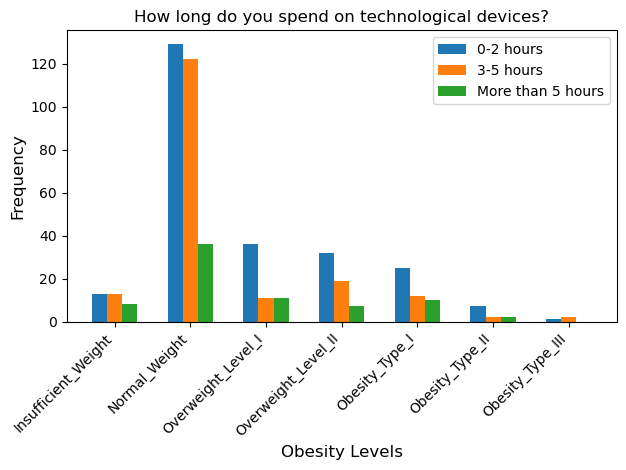

In [36]:
# Sample data for "How long do you spend on technological devices?"
categories = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
values1 = []
values2 = []
values3 = []
for i in categories:
    values1.append((obesity_df[obesity_df['NObeyesdad'] == i]['TUE']== 0).sum())
    values2.append((obesity_df[obesity_df['NObeyesdad'] == i]['TUE']== 1).sum())
    values3.append((obesity_df[obesity_df['NObeyesdad'] == i]['TUE']== 2).sum())


# Define the width of the bars
bar_width = 0.2

# Calculate the position of each group of bars on the x-axis
x = range(len(categories))

# Create bars
plt.bar(x, values1, width=bar_width, label='0-2 hours')
plt.bar([pos + bar_width for pos in x], values2, width=bar_width, label='3-5 hours') 
plt.bar([pos + 2 * bar_width for pos in x], values3, width=bar_width, label = 'More than 5 hours')

# Add labels and title
plt.xlabel('Obesity Levels', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('How long do you spend on technological devices?')
plt.xticks([pos + bar_width for pos in x], categories, rotation=45, ha='right')  # Set x-axis labels
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

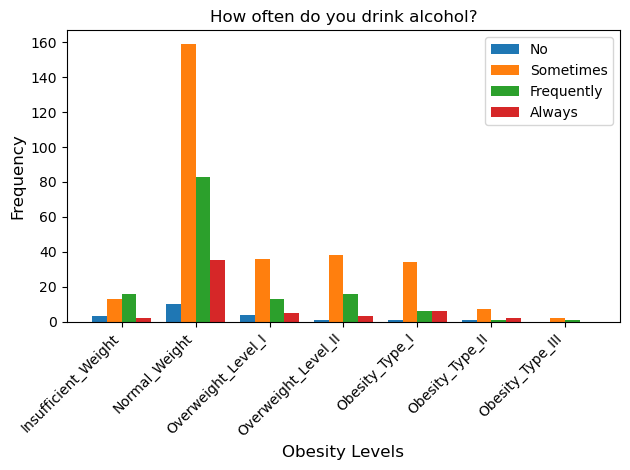

In [37]:
# Sample data for "How often do you drink alcohol?"
categories = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
values1 = []
values2 = []
values3 = []
values4 = []
for i in categories:
    values1.append((obesity_df[obesity_df['NObeyesdad'] == i]['CAEC']== 'no').sum())
    values2.append((obesity_df[obesity_df['NObeyesdad'] == i]['CAEC']== 'Sometimes').sum())
    values3.append((obesity_df[obesity_df['NObeyesdad'] == i]['CAEC']== 'Frequently').sum())
    values4.append((obesity_df[obesity_df['NObeyesdad'] == i]['CAEC']== 'Always').sum())

# Define the width of the bars
bar_width = 0.2

# Calculate the position of each group of bars on the x-axis
x = range(len(categories))

# Create bars
plt.bar(x, values1, width=bar_width, label='No')
plt.bar([pos + bar_width for pos in x], values2, width=bar_width, label='Sometimes')
plt.bar([pos + 2 * bar_width for pos in x], values3, width=bar_width, label = 'Frequently')
plt.bar([pos + 3 * bar_width for pos in x], values4, width=bar_width, label = 'Always')

# Add labels and title
plt.xlabel('Obesity Levels', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('How often do you drink alcohol?')
plt.xticks([pos + 1.5 * bar_width for pos in x], categories, rotation=45, ha='right')  # Set x-axis labels
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

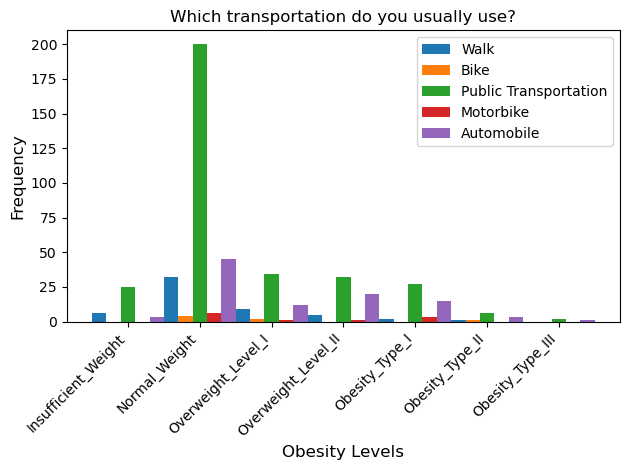

In [38]:
# Sample data for mode of transportation
categories = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
values1 = []
values2 = []
values3 = []
values4 = []
values5 = []
for i in categories:
    values1.append((obesity_df[obesity_df['NObeyesdad'] == i]['MTRANS']== 'Walking').sum())
    values2.append((obesity_df[obesity_df['NObeyesdad'] == i]['MTRANS']== 'Bike').sum())
    values3.append((obesity_df[obesity_df['NObeyesdad'] == i]['MTRANS']== 'Public_Transportation').sum())
    values4.append((obesity_df[obesity_df['NObeyesdad'] == i]['MTRANS']== 'Motorbike').sum())
    values5.append((obesity_df[obesity_df['NObeyesdad'] == i]['MTRANS']== 'Automobile').sum())

# Define the width of the bars
bar_width = 0.2

# Calculate the position of each group of bars on the x-axis
x = range(len(categories))

# Create bars
plt.bar(x, values1, width=bar_width, label='Walk')
plt.bar([pos + bar_width for pos in x], values2, width=bar_width, label='Bike')
plt.bar([pos + 2 * bar_width for pos in x], values3, width=bar_width, label = 'Public Transportation')
plt.bar([pos + 3 * bar_width for pos in x], values4, width=bar_width, label = 'Motorbike')
plt.bar([pos + 4 * bar_width for pos in x], values5, width=bar_width, label = 'Automobile')

# Add labels and title
plt.xlabel('Obesity Levels', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Which transportation do you usually use?')
plt.xticks([pos + 2 * bar_width for pos in x], categories, rotation=45, ha='right')  # Set x-axis labels
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

# Model Selection

We used a binary logistical regression model to predict whether or not someone is obese. For explanatory variables, those identified statistically significance in our exploratory data analysis were tested in the model to find the best fit. Categorical data was encoded as numerical values. Multicollinearity was also tested by calculating VIF. The model was then trained and tested on the data to determine its success in predicting obesity level. 

In [39]:
# Rename columns
obesity_df.rename(columns={'NObeyesdad': 'obese', 
                           'Gender':'gender',
                           'Age':'age',
                           'Weight': 'weight',
                           'family_history_with_overweight': 'family_history',
                           'FAF':'physical_activity',
                           'NCP':'main_meals_daily',
                           'SCC':'calories_monitoring',
                           'FAVC':'eat_frequent_high_calorie',
                           'CALC':'drink_alcohol'}, inplace=True)

In [40]:
# Encoding the Yes/No column
obesity_df['family_history']             = obesity_df['family_history'].map({'yes': 1, 'no': 0})
obesity_df['calories_monitoring']        = obesity_df['calories_monitoring'].map({'yes': 1, 'no': 0})
obesity_df['eat_frequent_high_calorie']  = obesity_df['eat_frequent_high_calorie'].map({'yes': 1, 'no': 0})
obesity_df['gender']                     = obesity_df['gender'].map({'Female': 1, 'Male': 0})
obesity_df['drink_alcohol']              = obesity_df['drink_alcohol'].map({'no':0, 'Sometimes':1, 'Frequently':1, 'Always':1})


In [41]:
# Binary grouping obese and non-obese
obesity_df['obese'] = obesity_df['obese'].map({'Normal_Weight': 0, 'Overweight_Level_I': 0,
                                               'Overweight_Level_II':1,'Obesity_Type_I': 1,
                                               'Insufficient_Weight': 0, 'Obesity_Type_II': 1,
                                               'Obesity_Type_III': 1})

In [42]:
# Identify explanatory variables
dfs = [obesity_df['gender'], obesity_df['age'], obesity_df['weight'], obesity_df['family_history'],
        obesity_df['physical_activity'], obesity_df['drink_alcohol']]

In [43]:
# Format column-wise
X = pd.concat(dfs, join='outer', axis=1)
# Add constant term
X = sm.add_constant(X)
# Identify response variable
y = obesity_df['obese']


In [44]:
# Calculate VIF for each independent variable to check multicollinearity.
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in np.arange(2,X.shape[1])]
vif["features"] = X.columns[2:]

if (vif["VIF Factor"] > 10).any(): 
    print('Multicollinearity in the features.')
else:
    print('Features are free of multicollinearity.')

Features are free of multicollinearity.


In [45]:
# Split the obesity_dfset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize and fit the logistic regression model
model = sm.Logit(y_train, X_train).fit()
print(model.summary())

# Make predictions
predictions = model.predict(X_test)

# Calculate AUC (Area Under the ROC Curve)
auc_score = roc_auc_score(y_test, predictions)
print(f'Area Under the ROC Curve (AUC): {auc_score:0.3f}')

Optimization terminated successfully.
         Current function value: 0.182852
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  obese   No. Observations:                  398
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            6
Date:                Mon, 26 Feb 2024   Pseudo R-squ.:                  0.6707
Time:                        21:28:11   Log-Likelihood:                -72.775
converged:                       True   LL-Null:                       -221.02
Covariance Type:            nonrobust   LLR p-value:                 4.619e-61
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -22.6793      2.732     -8.300      0.000     -28.035     -17.324
gender  

# Model Analysis

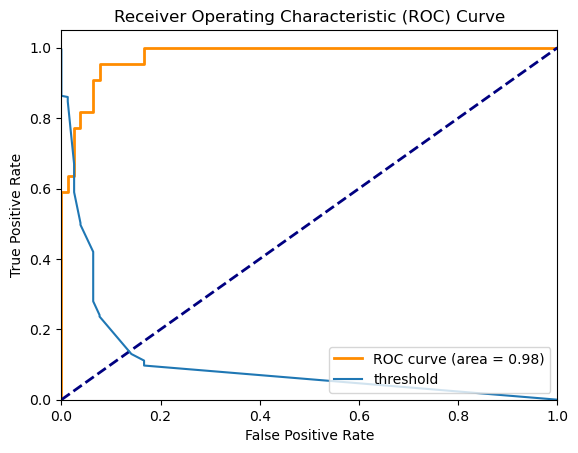

In [46]:
# Calculate false posive rate, true positive rate and threshold 
fpr, tpr, thresholds  = roc_curve(y_test, predictions)
# Plot ROC curve and threshold
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_score:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.plot(fpr, thresholds, label='threshold')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [47]:
# Set the threshold
prediction_threshold = 0.6
# Calculate the absolute difference between each threshold and the target value (0.6)
absolute_differences = np.abs(thresholds - prediction_threshold)
# Find the index of the smallest difference
closest_index = np.argmin(absolute_differences)

print(f"True Positive Rate: {tpr[closest_index]:0.3f}, False Positive Rate: {fpr[closest_index]:0.3f}")

# Map the probability to binary response
predictions_binary = predictions.apply(lambda x: 1 if x > prediction_threshold else 0)

True Positive Rate: 0.773, False Positive Rate: 0.026


Confusion Matrix:
[[76  2]
 [ 6 16]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        78
           1       0.89      0.73      0.80        22

    accuracy                           0.92       100
   macro avg       0.91      0.85      0.88       100
weighted avg       0.92      0.92      0.92       100



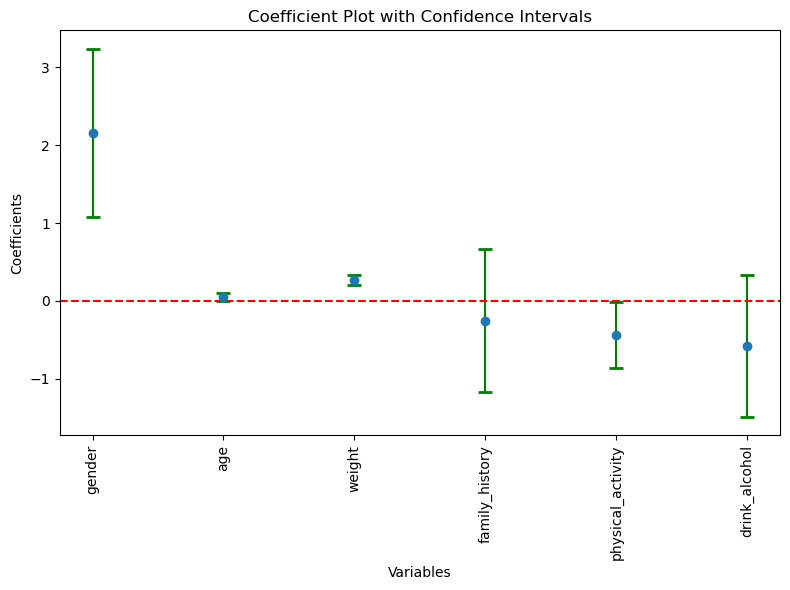

In [48]:
# Evaluate the model

# Compute confusion matrix to evaluate the accuracy of a classification.
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions_binary))

print("\nClassification Report:")
print(classification_report(y_test, predictions_binary))

coefficients = model.params
conf_int = model.conf_int()

# Creating a DataFrame for coefficients and confidence intervals
df_coeffs = pd.DataFrame({'coef': coefficients.values[1:], 'lower': conf_int.iloc[1:, 0], 'upper': conf_int.iloc[1:, 1]})
df_coeffs['variables'] = coefficients.index[1:]

# Plot errorbar 
plt.figure(figsize=(8, 6))
# errorbar to represent error margins or confidence intervals around a measurement. 
plt.errorbar(df_coeffs['variables'], df_coeffs['coef'], 
              yerr=[df_coeffs['coef'] - df_coeffs['lower'], df_coeffs['upper'] - df_coeffs['coef']], 
              fmt='o', ecolor='g', capthick=2, capsize=5)

plt.axhline(y=0, linestyle='--', color='red')
plt.xticks(rotation=90)
plt.title('Coefficient Plot with Confidence Intervals')
plt.ylabel('Coefficients')
plt.xlabel('Variables')
plt.tight_layout()